## What is Support Vector Machines (SVM)?

Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used primarily for classification tasks, but it can also be used for regression. SVM works by finding the optimal hyperplane that best separates data points of different classes in a high-dimensional space. The goal is to maximize the margin between the closest points of the classes, which are called support vectors.

Key characteristics of SVM:
- **Margin maximization:** SVM tries to find the hyperplane with the largest margin between classes, which helps improve generalization.
- **Support vectors:** Only a subset of training data points (the support vectors) are used to define the decision boundary.
- **Kernel trick:** SVM can efficiently perform non-linear classification using kernel functions, which map input data into higher-dimensional spaces.

SVMs are widely used in applications such as image recognition, text categorization, and bioinformatics due to their effectiveness in high-dimensional spaces.


 
**Use Cases of SVM Classification Model**
 
Support Vector Machines (SVM) are widely used in various real-world applications due to their effectiveness in handling high-dimensional data and their ability to model complex decision boundaries. Some common use cases include:
 
- **Image Classification:** SVMs are used to classify images into different categories, such as distinguishing between cats and dogs, or identifying handwritten digits (e.g., MNIST dataset).
- **Text Categorization:** SVMs are effective for classifying documents, emails, or web pages into categories such as spam vs. non-spam, sentiment analysis, or topic classification.
- **Bioinformatics:** SVMs help in classifying genes, proteins, or disease types based on biological data, such as cancer detection from gene expression profiles.
- **Face Detection:** SVMs are used in computer vision for detecting faces in images or videos.
- **Handwriting Recognition:** SVMs can recognize handwritten characters or numbers, making them useful in postal code recognition and form processing.
- **Financial Fraud Detection:** SVMs are applied to detect fraudulent transactions by classifying transaction patterns as normal or suspicious.
- **Medical Diagnosis:** SVMs assist in diagnosing diseases by classifying patient data into healthy or diseased categories.
 
 These examples highlight the versatility and robustness of SVMs in solving a wide range of classification problems across different domains.


![alt text](<Untitled picture.png>)

SVM helps when two points which are of different category looks almost closer. like apple looks Orange and vice versa cases


![alt text](<Untitled picture-1.png>)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



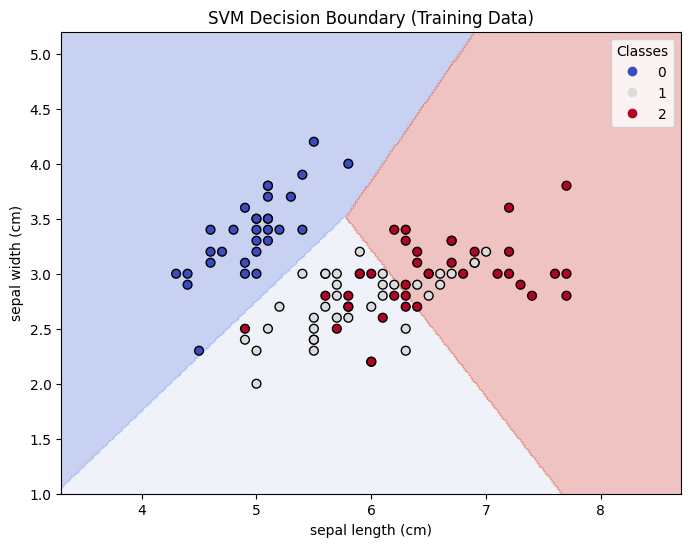

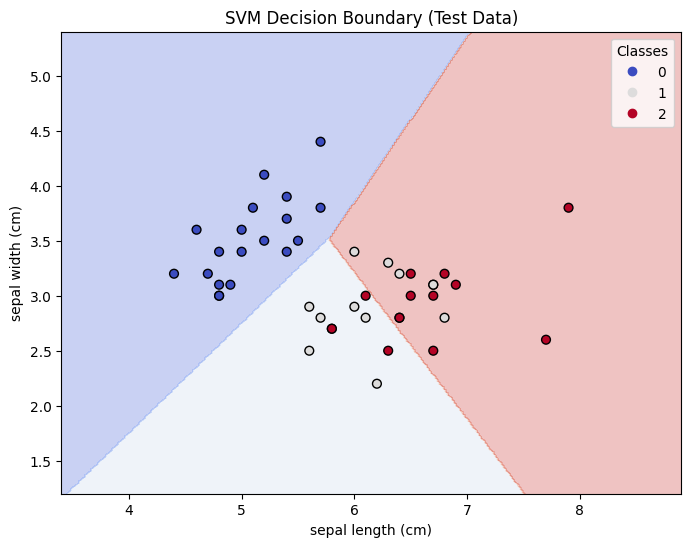

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load a sample dataset (Iris)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# For visualization, use only the first two features
X_vis = X[:, :2]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization of decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundaries(X_train, y_train, clf, "SVM Decision Boundary (Training Data)")
plot_decision_boundaries(X_test, y_test, clf, "SVM Decision Boundary (Test Data)")



The main hyperparameters of an SVM (Support Vector Machine) classification model include:

1. **kernel**: Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'poly', 'rbf', 'sigmoid').
2. **C**: Regularization parameter. Controls the trade-off between achieving a low training error and a low testing error (generalization).
     - **Low C value**: The model is more regularized, allowing for a wider margin but potentially more misclassifications on the training data. This can lead to better generalization but may underfit if C is too low.
     - **High C value**: The model tries to classify all training examples correctly by giving less regularization, resulting in a narrower margin. This can lead to overfitting, as the model may become too sensitive to the training data and noise.
3. **gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. Defines how far the influence of a single training example reaches.
    - **Low gamma**: The model considers points at a larger distance for decision boundaries, resulting in smoother, less complex boundaries (risk of underfitting).
    - **High gamma**: The model focuses on points very close to the decision boundary, creating more complex, wiggly boundaries (risk of overfitting).
4. degree: Degree of the polynomial kernel function ('poly'). Ignored by other kernels.
5. coef0: Independent term in kernel function. It is used in 'poly' and 'sigmoid' kernels.
6. probability: Whether to enable probability estimates (slower, but useful for probabilistic outputs).
7. shrinking: Whether to use the shrinking heuristic.
8. class_weight: Set the parameter C of class i to class_weight[i]*C, useful for unbalanced classes.

These hyperparameters can be tuned to optimize the performance of the SVM classifier for a specific dataset.



**Pros and Cons of SVM (Support Vector Machine) Classifiers**
 
**Pros:**
- Effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples.
- Memory efficient, as it uses a subset of training points (support vectors) in the decision function.
- Versatile: different kernel functions can be specified for the decision function, making it adaptable to various data types and distributions.
- Works well for both linear and non-linear classification tasks.
 
**Cons:**
- Not suitable for very large datasets, as training time can be high.
- Less effective when the data is heavily noisy or overlapping, as SVMs are sensitive to outliers.
- Choosing the right kernel and tuning hyperparameters (like C, gamma) can be complex and computationally expensive.
- SVMs do not provide direct probability estimates (unless enabled with additional computation).
